In [1]:
# Name - Shivam Dargan
# Computational Statistics
# CSBS 1
# 102018021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./kc_house_data.csv')
print(df)

               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0     

In [3]:
df=df.iloc[:,[5,2]]
print(df)

       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21592         1530  360000.0
21593         2310  400000.0
21594         1020  402101.0
21595         1600  400000.0
21596         1020  325000.0

[21597 rows x 2 columns]


## Univariate Linear Regression Equation
# price=$B_1$(Sqft_Living)+ $B_0$

In [4]:
dt=df.values
dt

array([[  1180., 221900.],
       [  2570., 538000.],
       [   770., 180000.],
       ...,
       [  1020., 402101.],
       [  1600., 400000.],
       [  1020., 325000.]])

In [5]:
def mean_sqft(val):
    sums=0
    for i in range(0,val.shape[0]):
        sums+=(val[i][0])
    return sums/val.shape[0]

def mean_price(val):
    sums=0
    for i in range(0,val.shape[0]):
        sums = sums + (val[i][1])
    return sums/val.shape[0]

def variance_sqft(val):
    mean_s=mean_sqft(val)
    sums=0
    for i in range(0,val.shape[0]):
        sums = sums + ((val[i][0]-mean_s)**2)
    return sums/(val.shape[0]-1)

def cov_sqft_price(val):
    mean_s=mean_sqft(val)
    mean_p=mean_price(val)
    cor=0
    for i in range(0,val.shape[0]):
        cor = cor + ((val[i][0]-mean_s)*(val[i][1]-mean_p))
    return cor/(val.shape[0]-1)


def stdDev_sqft(val):
    sums=0
    mean_s = mean_sqft(val)
    for i in range(0,val.shape[0]):
        sums = sums + ((val[i][0])- mean_s)**2
    dev = sums/val.shape[0]
    return (dev)**0.5

def stdDev_price(val):
    sums=0
    mean_p = mean_price(val)
    for i in range(0,val.shape[0]):
        sums = sums + (((val[i][1])-mean_p)**2)
    dev = sums/val.shape[0]
    return (dev)**0.5


In [6]:
num=cov_sqft_price(dt)
denom=variance_sqft(dt)
B1=num/denom
B1=B1.round(6)
B1                                           #coefficient of x

280.863014

In [7]:
B0=(mean_price(dt)-(B1*mean_sqft(dt)))    # intercept
B0=B0.round(6)
B0

-43988.891448

In [8]:
price_predict=[]
for i in range(0,dt.shape[0]):
    price=B1*dt[i][0]+B0
    price_predict.append(price)
price_predict

[287429.46507200005,
 677829.0545320001,
 172275.629332,
 506502.6159920001,
 427860.97207200003,
 1478288.6444320001,
 437691.17756200006,
 253725.90339200004,
 455947.27347200003,
 486842.20501200005,
 955883.438392,
 281812.20479200006,
 357645.21857200004,
 340793.437732,
 464373.16389200004,
 784556.999852,
 486842.20501200005,
 405391.9309520001,
 293046.72535200004,
 307089.87605200004,
 411009.19123200007,
 812643.301252,
 593570.1503320001,
 256534.533532,
 644125.492852,
 436286.86249200004,
 644125.492852,
 349219.32815200003,
 382922.8898320001,
 677829.0545320001,
 607613.3010320001,
 290238.0952120001,
 610421.931172,
 262151.793812,
 534588.9173920001,
 601996.0407520001,
 422243.71179200005,
 618847.8215920001,
 298663.985632,
 691872.2052320001,
 677829.0545320001,
 1141253.0276320002,
 965713.6438820001,
 396966.0405320001,
 315515.76647200005,
 843538.232792,
 234065.492412,
 599187.410612,
 307089.87605200004,
 729226.986094,
 290238.0952120001,
 840729.602652,
 352

In [9]:
def corr_coeff(val):
    num= cov_sqft_price(val)/(val.shape[0]-1)               
    denom= (stdDev_sqft(val))*(stdDev_price(val))                 
    r= num/denom
    return r
corr_coeff(dt)

3.25036953291387e-05

In [10]:
def SST(val):                               # sum of square total
    m=mean_price(val)
    sums=0
    for i in range(0,val.shape[0]):
        sums+=(((val[i][1]-m)**2))
    return sums
SST(dt)

2914582130408188.5

In [11]:
def SSR(val):                              # sum of squares of regression
    sums=0
    for i in range(0,val.shape[0]):
        sums += (price_predict[i]-mean_price(dt))**2
    return sums
print(SSR(dt))

1435979342741732.2


In [12]:
SSE = SST(dt) - SSR(dt)
SSE

1478602787666456.2

In [14]:
def R_Square(val):                      # R square
    SSR_val=1435979342741732.2
    Rsq=SSR_val/SST(val)
    return Rsq

print(R_Square(dt))
print((R_Square(dt))**0.5)

0.49268789778129285
0.7019173012408889


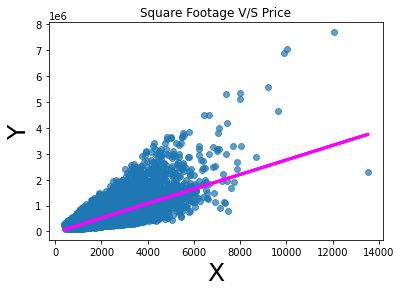

In [43]:
# line of linear regression

price_actual=list()
for i in range(0,dt.shape[0]):
    price_actual.append(dt[i][1])
plt.scatter(dt[:,0],price_actual,alpha=0.7)
plt.plot(dt[:,0],price_predict,color='magenta', linewidth= 3)
plt.title("Square Footage V/S Price")
plt.xlabel("X", fontsize = 25)
plt.ylabel("Y", fontsize = 25)
plt.show()

# Inbuilt Function Using Sklearn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression()

In [25]:
price=df[["price"]]
price

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21592,360000.0
21593,400000.0
21594,402101.0
21595,400000.0


In [26]:
sqft=df[["sqft_living"]]
sqft

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21592,1530
21593,2310
21594,1020
21595,1600


In [27]:
regressor.fit(sqft,price)

LinearRegression()

In [28]:
regressor.coef_

array([[280.86301436]])

In [29]:
regressor.intercept_

array([-43988.89219423])

In [30]:
predict = regressor.predict(sqft)
predict

array([[287429.46474925],
       [677829.05470808],
       [172275.62886211],
       ...,
       [242491.38245183],
       [405391.93077997],
       [242491.38245183]])

In [31]:
r = df.corr()
r

,sqft_living,price
sqft_living,1.000000,0.701917
price,0.701917,1.000000


In [33]:
from sklearn.metrics import r2_score
r2_score(price,price_predict)

0.49268789904035093

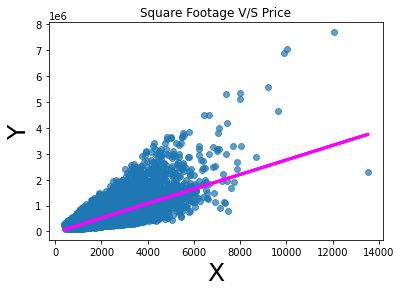

In [42]:
plt.scatter(sqft,price, alpha = 0.7)
plt.plot(sqft, price_predict, color = 'magenta',linewidth= 3)
plt.title("Square Footage V/S Price")
plt.xlabel("X", fontsize = 25)
plt.ylabel("Y", fontsize = 25)
plt.show()